<a href="https://colab.research.google.com/github/rishabhk0/Rishabh_ML_AI/blob/main/Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
assert sys.version_info>=(3,7)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn

In [3]:
from google.colab import files
uploaded = files.upload()


Saving mnist.csv to mnist.csv


In [4]:
df= pd.read_csv('mnist.csv')

In [5]:
df.head()

,id,class,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,31953,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,34452,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,60897,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,36953,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1981,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Columns: 786 entries, id to pixel784
dtypes: int64(786)
memory usage: 24.0 MB


In [7]:
df.describe()

,id,class,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,4000.000000,4000.000000,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,...,4000.000000,4000.000000,4000.000000,4000.000000,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0
mean,34415.179250,4.439500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.076750,0.015250,0.013000,0.001500,0.0,0.0,0.0,0.0,0.0,0.0
std,20508.890104,2.879655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.616022,0.964495,0.822192,0.094868,0.0,0.0,0.0,0.0,0.0,0.0
min,17.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
25%,16575.750000,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
50%,34435.500000,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
75%,52111.500000,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
max,69998.000000,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,125.000000,61.000000,52.000000,6.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
X = df.drop('class', axis=1)
y = df['class']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =42)

In [10]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train,y_train)
X_test, y_test = shuffle(X_test, y_test)

In [11]:
len(X_train)

3200

In [12]:
len(X_test)

800

In [13]:
X_train.head()

,id,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
638,64415,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2701,2445,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1714,24799,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,47183,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
749,57803,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
X_test.head()

,id,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
2452,63268,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3991,63630,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1360,58783,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
798,17005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1702,33856,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

In [16]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
y_prediction = model.predict(X_test)

In [18]:
print(y_prediction)

[1 3 2 1 3 5 1 6 3 8 2 6 2 1 0 9 9 5 7 2 2 7 3 1 2 4 1 6 1 7 4 0 5 7 6 1 9
 9 1 8 0 1 6 1 6 5 3 7 3 9 1 4 0 1 1 7 2 2 1 4 4 2 4 1 9 7 6 5 8 4 4 3 5 9
 3 6 0 1 1 8 0 8 4 2 8 0 3 1 8 1 9 1 0 3 9 4 0 2 2 5 2 4 1 8 0 2 3 1 1 1 6
 5 0 1 0 3 8 2 0 3 1 9 5 6 5 5 1 4 5 4 6 6 0 0 5 6 4 1 6 8 8 9 7 8 7 2 9 7
 0 4 6 0 5 1 0 0 2 2 4 3 5 1 9 1 5 0 6 4 6 4 2 1 4 1 0 4 8 6 8 5 8 8 6 7 6
 9 6 8 9 6 6 6 8 8 4 9 0 9 1 3 2 6 4 4 4 2 6 7 4 2 9 9 1 9 7 2 8 2 0 4 1 2
 7 7 0 6 8 5 2 5 6 1 9 1 7 7 9 6 6 3 7 3 1 1 0 8 6 3 8 9 8 5 8 2 6 8 1 8 1
 1 1 5 1 5 9 3 1 8 4 0 6 4 8 4 4 2 8 5 1 3 7 7 1 1 2 6 4 9 3 3 1 9 7 2 2 8
 0 9 1 3 2 9 9 6 2 6 3 3 2 0 3 9 3 1 2 8 5 9 7 3 2 8 7 8 8 2 6 4 9 7 2 1 5
 3 5 9 8 4 8 1 8 5 3 3 9 3 6 7 0 8 2 1 0 2 3 6 1 6 6 3 1 3 9 2 2 6 3 0 2 7
 2 3 9 9 7 7 1 6 4 2 8 3 5 8 2 8 0 6 3 2 4 4 3 6 5 8 7 6 5 8 5 7 3 9 9 3 1
 3 3 6 1 4 4 4 8 3 7 1 6 6 8 3 2 1 3 4 7 1 5 1 5 6 8 0 0 8 2 1 0 6 6 8 1 1
 4 9 6 9 2 4 2 4 3 8 1 6 7 7 9 9 6 3 9 4 0 7 1 0 1 0 3 7 7 2 8 9 4 1 6 2 1
 9 1 1 9 8 7 8 1 4 8 1 4 

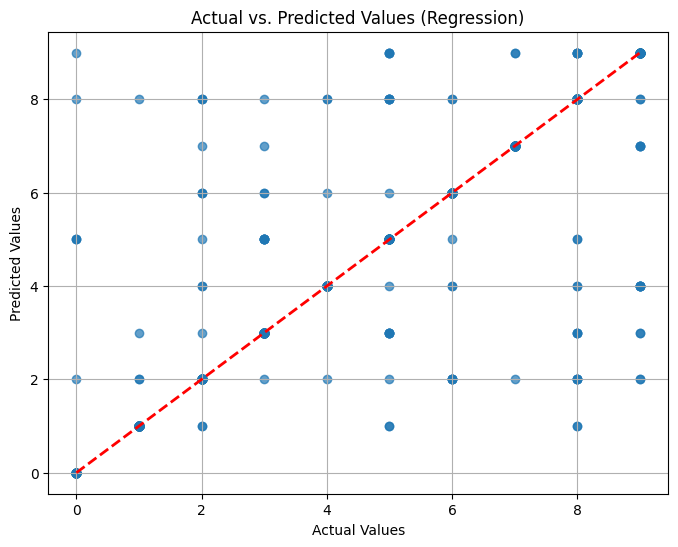

In [20]:
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_prediction, alpha=0.7)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2) # Diagonal line
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs. Predicted Values (Regression)")
    plt.grid(True)
    plt.show()

In [21]:
mse = mean_squared_error(y_test, y_prediction)
rmse = np.sqrt(mse)

In [22]:
print(mse)
print(rmse)

2.17
1.4730919862656235
